## Metrics

In [1]:
import editdistance

def calculate_metrics(preds):
    total_cer = 0
    total_wer = 0
    total_samples = len(preds)
    exact_match = 0
    total_chars = 0
    total_words = 0
    
    for gt, pred in preds:
        gt = gt.strip()
        pred = pred.strip()
        # CER
        char_dist = editdistance.eval(gt, pred)
        total_cer += char_dist
        total_chars += len(gt)
        # WER
        gt_words = gt.split()
        pred_words = pred.split()
        word_dist = editdistance.eval(gt_words, pred_words)
        total_wer += word_dist
        total_words += len(gt_words)
        # Sentence Accuracy
        if gt == pred:
            exact_match += 1
        # Edit Distance
        total_distance = sum(editdistance.eval(gt, pred) for gt, pred in preds) / len(preds)
    
    cer = total_cer / total_chars if total_chars > 0 else 0
    wer = total_wer / total_words if total_words > 0 else 0
    sentence_acc = exact_match / total_samples
    return cer, wer, sentence_acc, total_distance

In [2]:
from tqdm import tqdm
import os
from PIL import Image

def predict_crnn():
    pass
    
def get_predictions(df, image_dir, predict_func):
    predictions = []
    
    # Wrap the loop with tqdm to show a progress bar
    for index, row in tqdm(df.iterrows(), total=len(df), desc="Processing images"):
        image_name = row['image_name']
        gt_text = row['text']
        image_path = os.path.join(image_dir, image_name)
        
        # Load the image
        if predict_func == predict_crnn:
            image = Image.open(image_path).convert('L')
        else:
            image = Image.open(image_path).convert('RGB')
        
        # Get the prediction
        pred_text = predict_func(image)
        
        # Store ground truth and prediction
        predictions.append((gt_text, pred_text))
    
    return predictions

In [3]:
import pandas as pd
train_df = pd.read_csv('/kaggle/input/vaipe-crops/vaipe_crops/train.csv')
val_df = pd.read_csv('/kaggle/input/vaipe-crops/vaipe_crops/val.csv')

## VietOCR 

In [2]:
%pip install --quiet \
    pillow==9.5.0 \
    scikit-learn==1.5.2 \
    gymnasium==0.29.0 \
    rich==13.7.1 \
    matplotlib==3.8.0 \
    vietocr \
    torch \
    torchvision

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 37.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 102.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.7/240.7 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 103.6 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
import numpy as np
np.bool = bool
np.int  = int
np.float = float

In [4]:
import importlib, PIL, PIL._util
importlib.reload(PIL)
importlib.reload(PIL._util)

<module 'PIL._util' from '/usr/local/lib/python3.11/dist-packages/PIL/_util.py'>

In [5]:
import matplotlib.pyplot as plt
from PIL import Image
from vietocr.tool.config import Cfg
from vietocr.tool.predictor import Predictor
import os

np.bool = bool
np.int  = int
np.float = float

In [6]:
Image.ANTIALIAS = Image.LANCZOS

In [7]:
import torch
from torchvision import transforms

In [28]:
#config = Cfg.load_config_from_name('vgg_transformer')
config = Cfg.load_config_from_name('vgg_seq2seq')
# Set the path to the saved model
config['weights'] = '/kaggle/input/vgg_seq2seq_augemented/pytorch/default/1/vgg_seq2seq_aug.pth'

# Set device
config['device'] = 'cuda'  

# Initialize Predictor
predictor = Predictor(config)

In [29]:
def predict_vietocr(model, image):
    return model.predict(image)

In [30]:
def vietocr_recognize_text(model, image_path):
    image = Image.open(image_path).convert('RGB')
    pred_text = predict_vietocr(model, image)
    return pred_text

In [31]:
Image.open('/kaggle/input/vaipe-crops/vaipe_crops/train/VAIPE_P_TRAIN_0_15.png').convert('RGB')

In [32]:
vietocr_recognize_text(predictor, '/kaggle/input/vaipe-crops/vaipe_crops/train/VAIPE_P_TRAIN_0_15.png')

'Chấn đoán: T10 - Tăng huyết áp vô căn (nguyên phát): (LO8.0) Viêm da có mủ; (G46?) Hội chứng mạch'

In [15]:
def predict_vietocr(image):
    pred_text = predictor.predict(image)
    return pred_text

In [16]:
val_preds_vietocr = get_predictions(val_df, '/kaggle/input/vaipe-crops/vaipe_crops/val', predict_vietocr)

Processing images: 100%|██████████| 4121/4121 [07:42<00:00,  8.90it/s]


In [17]:
print("Val Set Metrics:")
print("VietOCR:", calculate_metrics(val_preds_vietocr))
# cer, wer, sentence_acc, total_distance

Val Set Metrics:
VietOCR: (0.014453985191315785, 0.016906873614190687, 0.9466148992962873, 0.23732103858286824)


## TrOCR

In [4]:
import os

In [5]:
os.environ["NO_ALBUMENTATIONS_UPDATE"] = "1"
os.environ["WANDB_MODE"] = "disabled"
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
import logging
import subprocess
logging.getLogger("transformers").setLevel(logging.INFO)

subprocess.run(
    "pip install --quiet --no-deps transformers torch pandas pillow albumentations",
    shell=True, check=True
)

CompletedProcess(args='pip install --quiet --no-deps transformers torch pandas pillow albumentations', returncode=0)

In [8]:
import pandas as pd
import torch
from torch.utils.data import Dataset
from PIL import Image
import numpy as np
from transformers import (
    TrOCRProcessor,
    VisionEncoderDecoderModel
)
#import Levenshtein

E0000 00:00:1748254395.693957      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748254395.751766      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [9]:
model = VisionEncoderDecoderModel.from_pretrained("/kaggle/input/trocrphobart/pytorch/default/1/TrOCRBartPho/final_model")
processor = TrOCRProcessor.from_pretrained("/kaggle/input/trocrphobart/pytorch/default/1/TrOCRBartPho/final_model")
    
# Move model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 768,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.51.3"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_mod

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=False)
              (key): Linear(in_features=768, out_features=768, bias=False)
              (value): Linear(in_features=768, out_features=768, bias=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_features=3072, bias=True)
            (i

In [10]:
def predict_trocr(image):
    inputs = processor(image, return_tensors="pt")
    inputs = {k: v.to(device) for k, v in inputs.items()}
    generated_ids = model.generate(**inputs)
    pred_text = processor.batch_decode(generated_ids.cpu(), skip_special_tokens=True)[0]
    return pred_text

In [13]:
val_preds_trocr = get_predictions(val_df, '/kaggle/input/vaipe-crops/vaipe_crops/val', predict_trocr)

Processing images: 100%|██████████| 4121/4121 [11:37<00:00,  5.91it/s]


In [14]:
print("Val Set Metrics:")
print("TrOCR:", calculate_metrics(val_preds_trocr))
# cer, wer, sentence_acc, total_distance

Val Set Metrics:
TrOCR: (0.36364039430708067, 0.5300027716186253, 0.26255763164280516, 5.970638194612958)


## R-CNN

In [33]:
!pip install torch torchvision torchaudio --quiet
!pip install albumentations --quiet

In [34]:
import torch
import torch.nn as nn
import albumentations as A
from albumentations.pytorch import ToTensorV2

# Define Vietnamese characters set (you can expand it)
# Including a blank character '' for CTC at index 0
lowercase = "aăâbcdđeêghijklmnoôơpqrstuưvwxyz" \
            "áàảãạằắẳẵặấầẩẫậéèẻẽẹếềểễệíìỉĩịóòỏõọốồổỗộớờởỡợúùủũụứừửữựýỳỷỹỵ0123456789"

uppercase = lowercase.upper()

special_chars = "/!@#$%^&*()_+:,.-;?{}[]|~` "

full_alphabet = lowercase + uppercase + special_chars
print(full_alphabet)
# Map char to index and vice versa
char_to_idx = {char: idx + 1 for idx, char in enumerate(full_alphabet)}  # start at 1; 0 is blank for CTC
idx_to_char = {idx: char for char, idx in char_to_idx.items()}

# Add blank character at index 0
idx_to_char[0] = ''

aăâbcdđeêghijklmnoôơpqrstuưvwxyzáàảãạằắẳẵặấầẩẫậéèẻẽẹếềểễệíìỉĩịóòỏõọốồổỗộớờởỡợúùủũụứừửữựýỳỷỹỵ0123456789AĂÂBCDĐEÊGHIJKLMNOÔƠPQRSTUƯVWXYZÁÀẢÃẠẰẮẲẴẶẤẦẨẪẬÉÈẺẼẸẾỀỂỄỆÍÌỈĨỊÓÒỎÕỌỐỒỔỖỘỚỜỞỠỢÚÙỦŨỤỨỪỬỮỰÝỲỶỸỴ0123456789/!@#$%^&*()_+:,.-;?{}[]|~` 


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.5'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [35]:
# Define the CRNN class
class CRNN(nn.Module):
    def __init__(self, imgH, nc, nclass, nh):
        super(CRNN, self).__init__()
        assert imgH % 16 == 0, "imgH has to be a multiple of 16"

        self.cnn = nn.Sequential(
            
            nn.Conv2d(nc, 64, 3, 1, 1),  # conv1
            nn.ReLU(True),
            nn.MaxPool2d(2, 2),          # 32x128 -> 16x64
            nn.Conv2d(64, 128, 3, 1, 1), # conv2
            nn.ReLU(True),
            nn.MaxPool2d(2, 2),          # 16x64 -> 8x32
            nn.Conv2d(128, 256, 3, 1, 1), # conv3
            nn.ReLU(True),
            nn.Conv2d(256, 256, 3, 1, 1), # conv4
            nn.ReLU(True),
            nn.MaxPool2d((2,2), (2,1), (0,1)), # 8x32 -> 4x33
            nn.Conv2d(256, 512, 3, 1, 1), # conv5
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.Conv2d(512, 512, 3, 1, 1), # conv6
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.MaxPool2d((2,2), (2,1), (0,1)), # 4x33 -> 2x34
            nn.Conv2d(512, 512, 2, 1, 0),  # conv7 kernel=2 no padding
            nn.ReLU(True)
        )

        self.rnn = nn.LSTM(
            input_size=512,
            hidden_size=nh,
            num_layers=2,
            bidirectional=True,
            batch_first=True
        )

        self.embedding = nn.Linear(nh * 2, nclass)

    def forward(self, x):
        conv = self.cnn(x)
        b, c, h, w = conv.size()
        assert h == 1, "height after conv must be 1"
        conv = conv.squeeze(2)
        conv = conv.permute(0, 2, 1)
        rnn_out, _ = self.rnn(conv)
        output = self.embedding(rnn_out)
        return output.log_softmax(2)

# Set up device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Compute nclass
nclass = len(full_alphabet) + 1

# Initialize model
crnn_model = CRNN(imgH=32, nc=1, nclass=nclass, nh=256).to(device)

# Load the saved state dictionary
crnn_model.load_state_dict(torch.load('/kaggle/input/rcnn/pytorch/default/1/best_crnn.pth', map_location=device))
crnn_model.eval()

CRNN(
  (cnn): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=(2, 2), stride=(2, 1), padding=(0, 1), dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU(inplace=True)
    (14): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): Bat

In [36]:
def beam_search_decode(probs, beam_width=5, blank=0):
    import math
    from collections import defaultdict

    seq_len, batch_size, nclass = probs.size()
    decoded_batch = []

    for batch_idx in range(batch_size):
        beam = [(tuple(), 0.0)]

        for t in range(seq_len):
            new_beam = defaultdict(lambda: -math.inf)
            time_step_log_prob = probs[t, batch_idx].cpu().numpy()

            for seq, score in beam:
                for c in range(nclass):
                    p = time_step_log_prob[c]
                    if len(seq) > 0 and c == seq[-1]:
                        new_seq = seq
                    else:
                        new_seq = seq + (c,) if c != blank else seq
                    new_score = score + p
                    if new_score > new_beam[new_seq]:
                        new_beam[new_seq] = new_score

            beam = sorted(new_beam.items(), key=lambda x: x[1], reverse=True)[:beam_width]

        best_seq, best_score = beam[0]

        # Filter blanks and repeated characters here
        decoded = []
        prev = None
        for idx in best_seq:
            if idx != blank and idx != prev:
                # Defensive check in case idx_to_char missing key
                char = idx_to_char.get(idx, '')
                if char != '':
                    decoded.append(char)
            prev = idx

        decoded_str = "".join(decoded)
        decoded_batch.append(decoded_str)

    return decoded_batch

In [37]:
def clean_decoded_text(text, blank_char=''):
    """
    Remove duplicates and blanks if any remain.
    Assumes blank_char is '' (empty string) for blank token.
    """
    cleaned = []
    prev_char = None
    for ch in text:
        if ch != blank_char and ch != prev_char:
            cleaned.append(ch)
        prev_char = ch
    return ''.join(cleaned)

In [48]:
def predict_crnn(image):
    transform = A.Compose([
        A.Resize(32, 2048),  
        A.Normalize(mean=(0.5,), std=(0.5,)),
        ToTensorV2(),
    ])
    augmented = transform(image=np.array(image))  # Pass image as a named argument
    image_tensor = augmented['image'].unsqueeze(0).to(device)  # Extract transformed image and add batch dimension
    with torch.no_grad():
        output = crnn_model(image_tensor)
    decoded_texts = beam_search_decode(output, beam_width=10, blank=0)
    raw_text = decoded_texts
    pred_text = clean_decoded_text(raw_text)  
    return pred_text

In [49]:
def predict_crnn_path(image_path):
    image = Image.open(image_path).convert('L')
    pred_text = predict_crnn(image)
    return pred_text

In [52]:
Image.open('/kaggle/input/vaipe-crops/vaipe_crops/val/VAIPE_P_TRAIN_895_18.png').convert('RGB')

In [58]:
predict_crnn_path('/kaggle/input/test-image-delete-when-see/test_image/074e52ba-0f4d-44ca-9147-0f4206038340 (1).png')

' não trong bệnh mạch não (I60-1677)'

In [55]:
val_preds_crnn = get_predictions(val_df, '/kaggle/input/test-image-delete-when-see/test_image/2bb8b82a-1b4c-4679-b56f-b261349b350e (1).png', predict_crnn)

NameError: name 'get_predictions' is not defined

In [39]:
print("Val Set Metrics:")
print("CRNN:", calculate_metrics(val_preds_crnn))
# cer, wer, sentence_acc, total_distance

Val Set Metrics:
CRNN: (0.023380577272660096, 0.0338830376940133, 0.9012375636981316, 0.3838874059694249)


In [63]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

def augment_and_plot(img_path: str,
                     crop_frac: float = 0.8,
                     blur_ksize: int = 5,
                     brightness: int = 40,          # −255 … 255
                     contrast: float = 1.3,         # 1.0 = no change
                     noise_sigma: int = 25):        # standard deviation of Gaussian noise
    """
    Display an image alongside five augmented versions:
    1. Center crop (or random crop if you like).
    2. Gaussian blur.
    3. Brightness & contrast adjustment.
    4. Gaussian-noise injection.
    
    Parameters
    ----------
    img_path : str
        Path to the source image.
    crop_frac : float, optional
        Fraction of width/height to retain in the crop (0–1).
    blur_ksize : int, optional
        Kernel size (must be odd) for Gaussian blur.
    brightness : int, optional
        Added to every pixel channel after contrast scaling (−255 … 255).
    contrast : float, optional
        Gain factor for contrast (≥0). 1.0 leaves contrast unchanged.
    noise_sigma : int, optional
        Standard deviation of zero-mean Gaussian noise.
    """
    
    # ------- load image (BGR) & convert to RGB for plotting -------
    path = Path(img_path)
    if not path.exists():
        raise FileNotFoundError(f"{path} does not exist.")
    bgr = cv2.imread(str(path))
    rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
    h, w = rgb.shape[:2]

    # ------- 1. crop -------
    ch, cw = int(h * crop_frac), int(w * crop_frac)
    y0, x0 = (h - ch) // 2, (w - cw) // 2          # centered crop
    crop = rgb[y0:y0+ch, x0:x0+cw]

    # ------- 2. gaussian blur -------
    blur = cv2.GaussianBlur(rgb, (blur_ksize, blur_ksize), 0)

    # ------- 3. brightness & contrast -------
    # new_img = contrast * img + brightness
    bc = cv2.convertScaleAbs(rgb, alpha=contrast, beta=brightness)

    # ------- 4. gaussian noise -------
    noise = np.random.normal(0, noise_sigma, rgb.shape).astype(np.int16)
    noisy = np.clip(rgb.astype(np.int16) + noise, 0, 255).astype(np.uint8)

    # ------- plot -------
    imgs   = [rgb, crop, blur, bc, noisy]
    titles = ["Original",
              f"Crop {crop_frac:.0%}",
              f"Gaussian blur k={blur_ksize}",
              f"Brightness/Contrast ({brightness:+}, ×{contrast})",
              f"Gaussian noise σ={noise_sigma}"]

    plt.figure(figsize=(15, 6))
    for i, (im, title) in enumerate(zip(imgs, titles), 1):
        plt.subplot(2, 3, i)
        plt.imshow(im)
        plt.title(title, fontsize=10)
        plt.axis("off")
    plt.tight_layout();  plt.show()


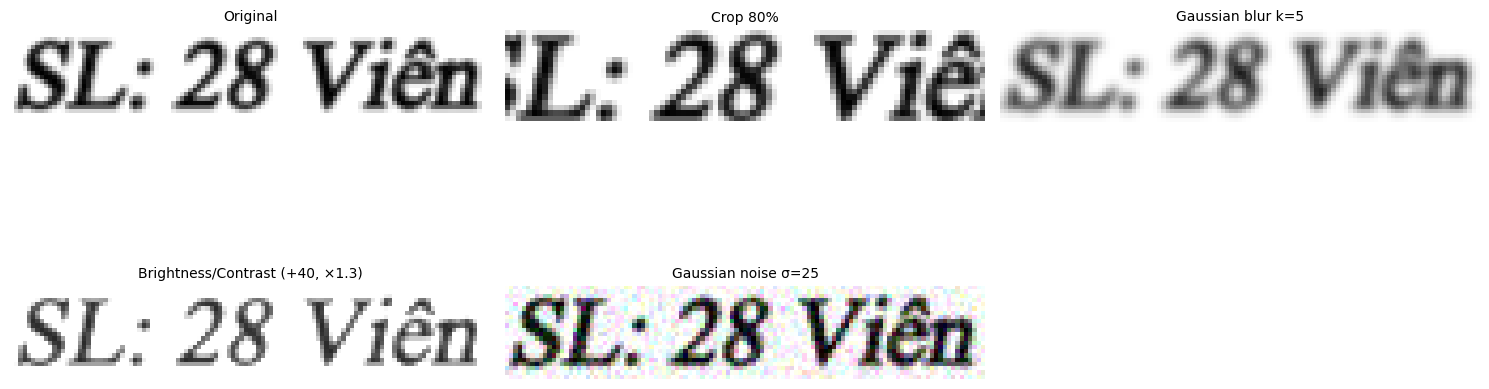

In [64]:
augment_and_plot("/kaggle/input/vaipe-crops/vaipe_crops/train/VAIPE_P_TRAIN_0_18.png")
